<a href="https://colab.research.google.com/github/cvrl10/MLA_CPA/blob/main/MLA4_CPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning Assignment 4**</br>
**CS430-ON**</br>
**MachineLearning in the Cloud**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##Imports for specific models

In [ ]:
from sklearn import tree

##SVC Classification - Acquire Data

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Module4/banknote_authentication.csv')

##Statistics and Visual Exploration

In [ ]:
df.head()
df

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


##Splitting Data into Train/Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.iloc[:, 0:-1]
y = df['forgery']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=32)

##Building the Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
num_attribs = list(X.columns)

In [ ]:
col_transform = ColumnTransformer(transformers=[
                                              ('num', MinMaxScaler(), num_attribs)
                                  ])

In [ ]:
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('decision_tree', tree.DecisionTreeClassifier(max_depth=5))
])

##Executing the Model

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('decision_tree', DecisionTreeClassifier(max_depth=5))])

##Evaluating the Model

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

In [ ]:
y_pred = pipeline.predict(X_test)

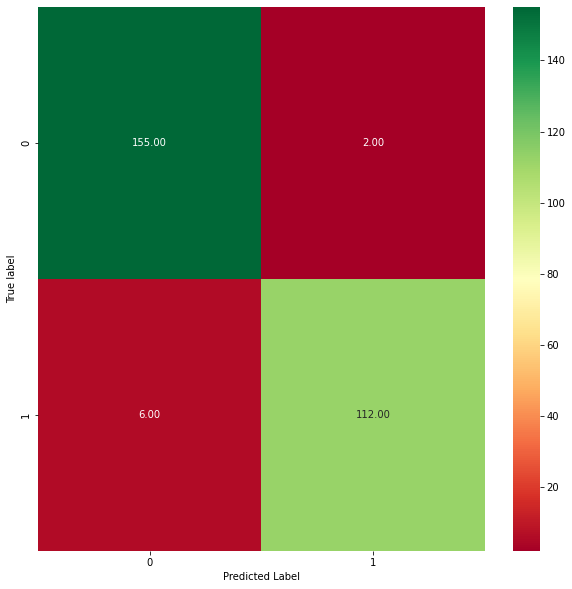

In [ ]:
plot_cm(y_test, y_pred)

In [ ]:
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

Precision:  0.9824561403508771
Recall:  0.9491525423728814
F1 Score:  0.9655172413793103


##Conclusion

With a high recall score this model is great predicting the positive class, a high precision also indicates that this model also predicts the negative class with a high accuracy, with a high recall and precision score the f1 score is also high. Overall, this model is a great fit to the dataset.

##**DecisionTree Regression**

##Acquire Data

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Module4/Steel_industry_data.csv')

In [ ]:
new_name = {'Usage_kWh':'usage_kwh', 
          'Lagging_Current_Reactive.Power_kVarh':'lag_react_pwr_kvarh',
          'Leading_Current_Reactive_Power_kVarh':'lead_react_pwr_kvarh',
          'Lagging_Current_Power_Factor':'lag_current_pwr',
          'Leading_Current_Power_Factor':'lead_current_pwr',
          'NSM':'nsm',
          'WeekStatus':'week_status',
          'Day_of_week':'day_of_week',
          'Load_Type':'load_type'}

In [ ]:
df.rename(columns=new_name, inplace=True)

##Splitting Data into Train/Test

In [ ]:
df.head()

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [ ]:
input_columns = list(df.columns)[2:len(df.columns)]

In [ ]:
X = df[input_columns]
y = df['usage_kwh']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=32)

##Building the Pipeline

In [ ]:
input_columns
num_attribs = input_columns[:-3]
cat_attribs = input_columns[len(input_columns)-3:]

In [ ]:
col_transform = ColumnTransformer(transformers=[
                                                ('num', MinMaxScaler(), num_attribs),
                                                ('cat', OneHotEncoder(), cat_attribs),
                                ])

In [ ]:
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('decision_tree', tree.DecisionTreeRegressor(max_depth=5))
])

##Executing the Pipeline

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr', 'nsm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type'])])),
                ('decision_tree', DecisionTreeRegressor(max_depth=5))])

##Evaluating the Model

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
print('The root mean squared error for the train is: ', mean_squared_error(y_train, pipeline.predict(X_train))**0.5)
print('The root mean squared error for the test is: ', mean_squared_error(y_test, y_pred)**0.5)

The root mean squared error for the train is:  3.5249255897811294
The root mean squared error for the test is:  3.6060394083742846


The root mean squared error for both the train and test set are relatively low meaning that on average the difference of the output from the model and the actual output from the data itself are small, this means that what the model predicts is close to what the data outputs. 

##Conclusion

The low values from the root mean square analysis indicates that the model issuitable for predicting Kwh usage. This model predicts Kwh usage that very close to the actual data when the inputs are from the dataset.